In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [279]:
data=pd.read_csv("amazon_alexa.tsv", sep='\t')

In [280]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [222]:
data.info

<bound method DataFrame.info of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                

In [223]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [224]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [225]:
pd.set_option('display.max_rows', 10)

In [165]:
data.verified_reviews

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

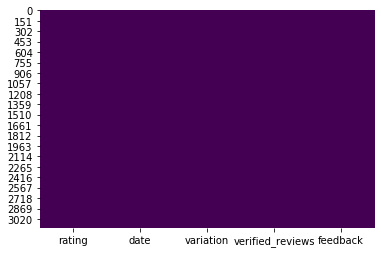

In [166]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")

In [167]:
data.isna().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236CAEC7648>,
      dtype=object)

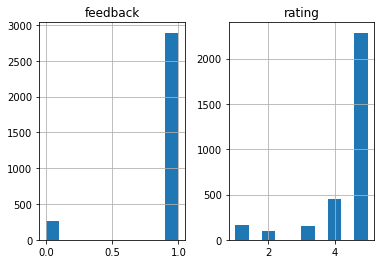

In [168]:
data.hist()

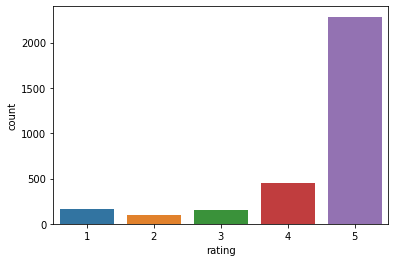

In [169]:
sns.countplot(data.rating)

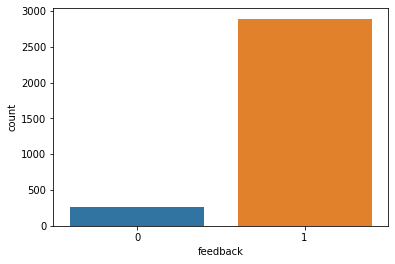

In [170]:
sns.countplot(data.feedback)

In [282]:
data['length'] =data.verified_reviews.apply(len)

In [283]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


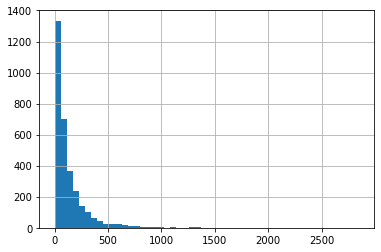

In [228]:
data.length.hist(bins=50)

In [229]:
data.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [230]:
data.loc[data['length']==2851]['verified_reviews']

2016    Incredible piece of technology.I have this rig...
Name: verified_reviews, dtype: object

In [231]:
data.loc[data['length']==1]['verified_reviews'].iloc[0]

'😍'

In [232]:
data[data['length'] == 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

In [233]:
positive = data[data['feedback']==1]

In [234]:
negative = data[data['feedback']==0]

<Figure size 2880x1296 with 0 Axes>

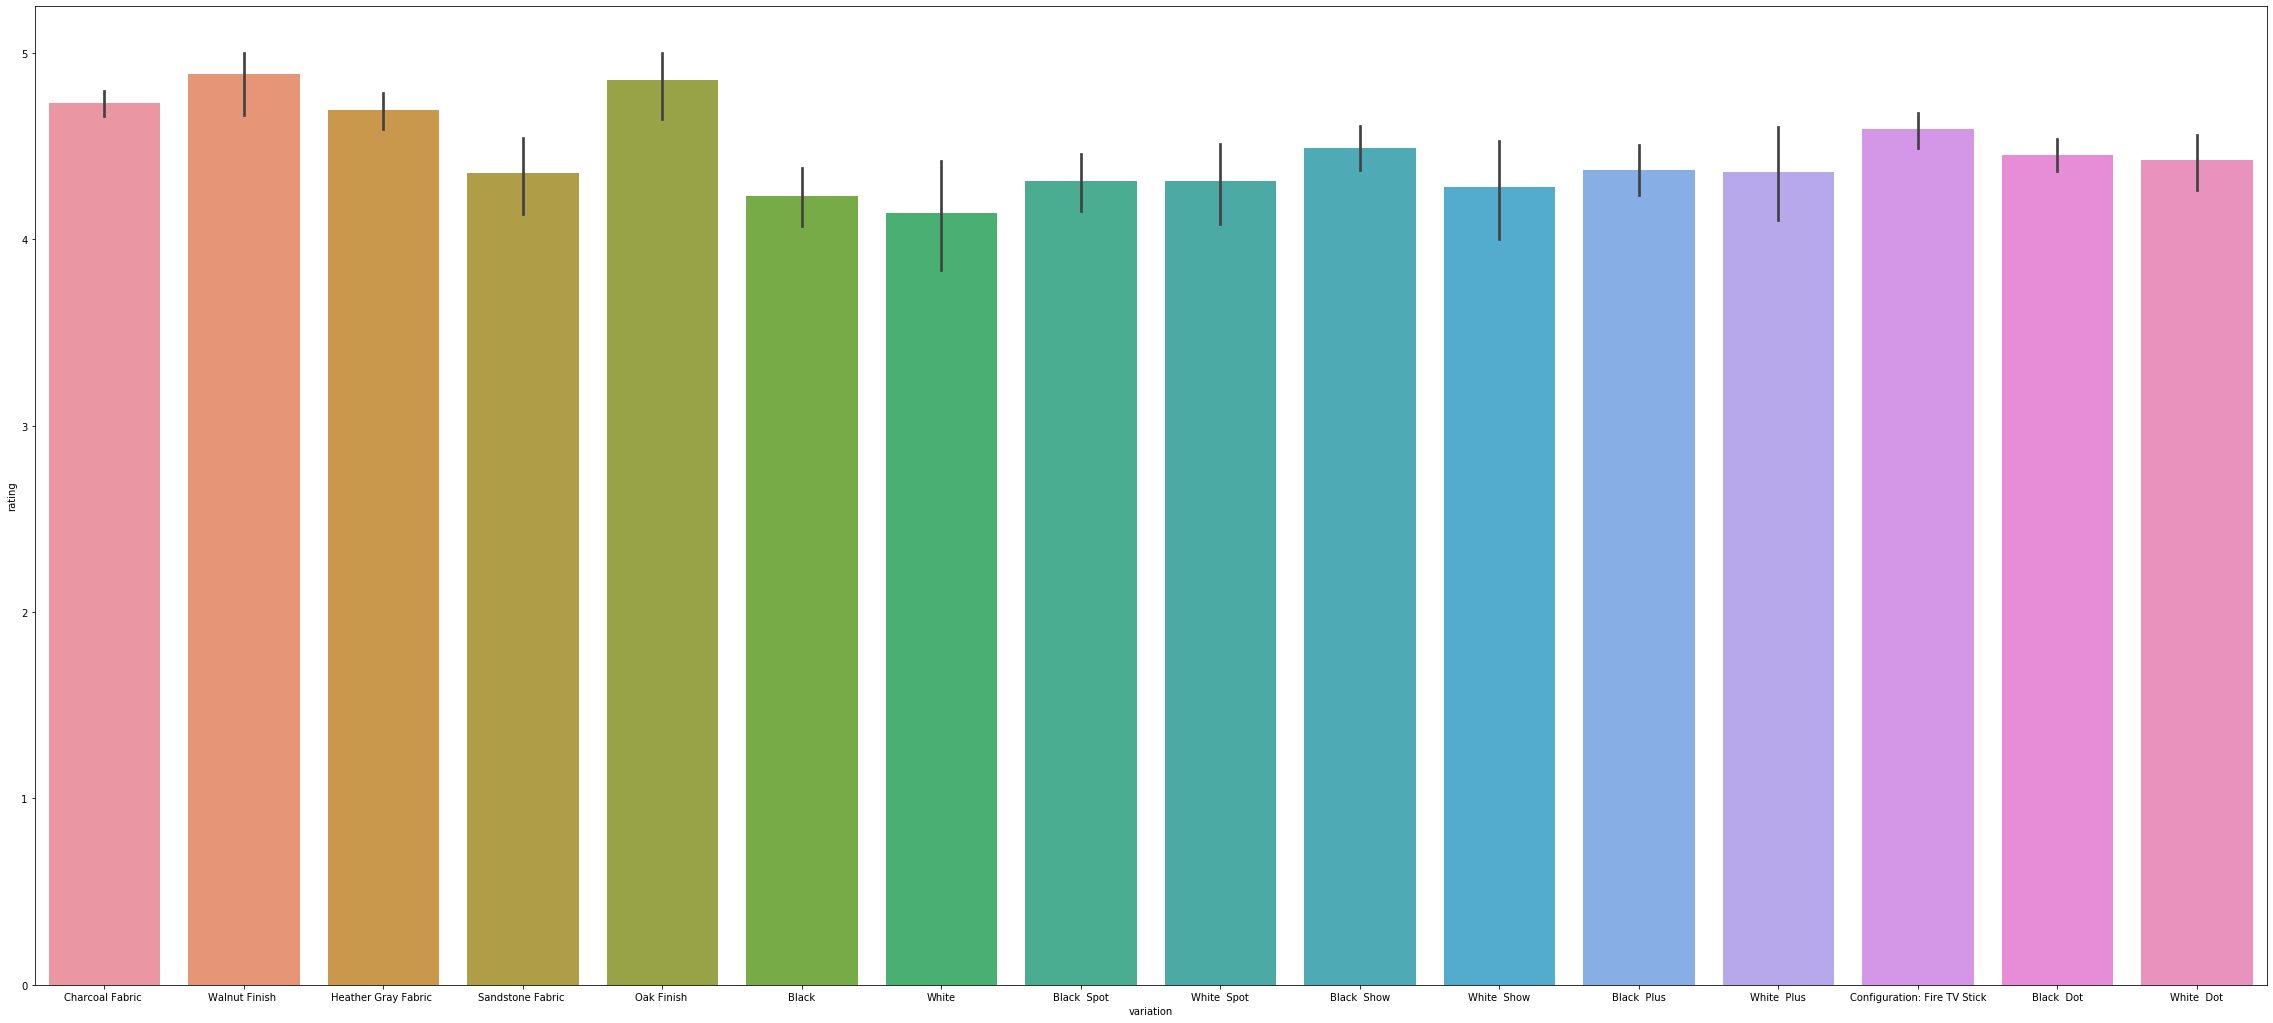

In [180]:
plt.figure(figsize = (40,18))
sns.barplot(x = 'variation', y='rating', data = data)

In [181]:
sentences = data['verified_reviews'].tolist()
len(sentences)

3150

In [235]:
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [236]:
combined_sentences = " ".join(sentences)

In [237]:
combined_sentences

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [ ]:
!pip install wordcloud

In [238]:
from wordcloud import WordCloud

<Figure size 1800x1080 with 0 Axes>

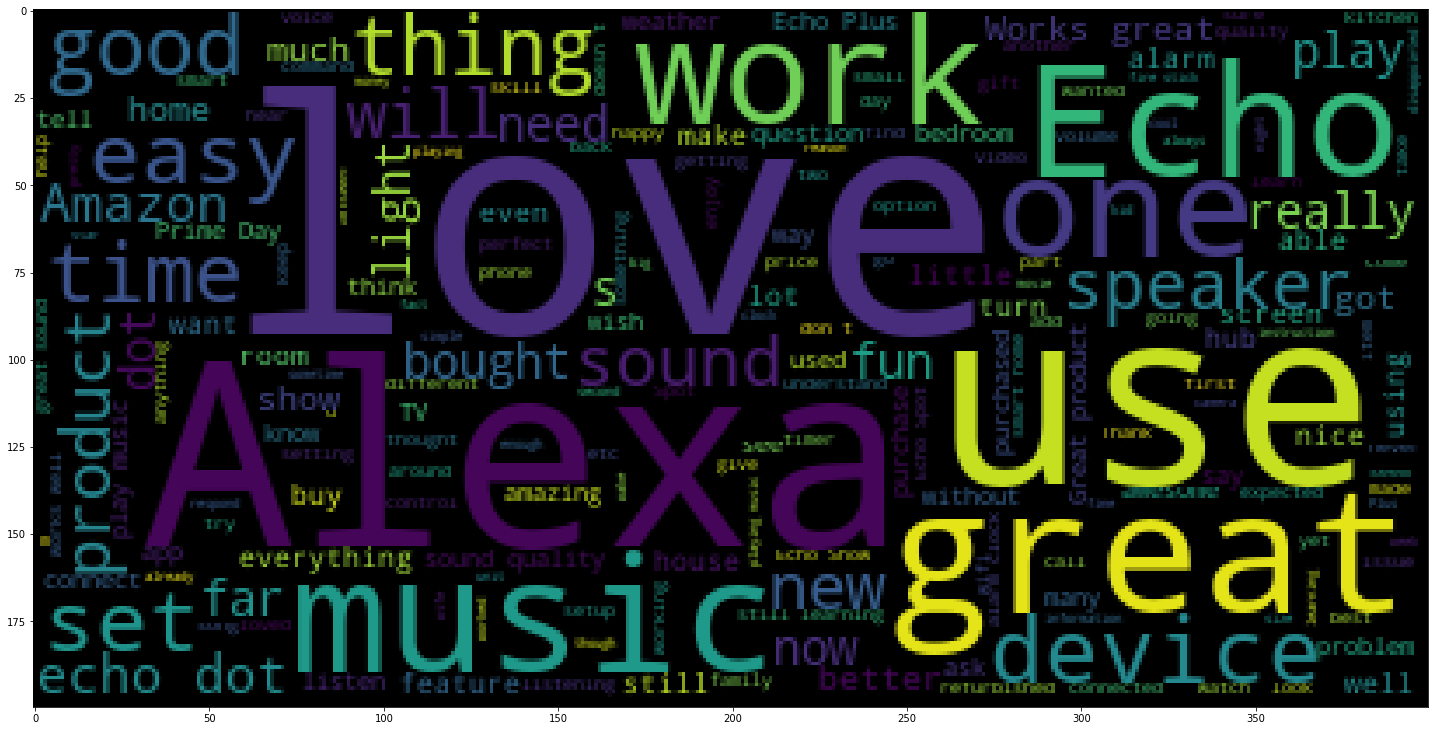

In [239]:
plt.figure(figsize=(25,15))
plt.imshow(WordCloud().generate(combined_sentences))


In [240]:
negative_sentences = negative['verified_reviews'].tolist()

In [241]:
negative_sentences_combined = " ".join(negative_sentences)

In [242]:
negative_sentences

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

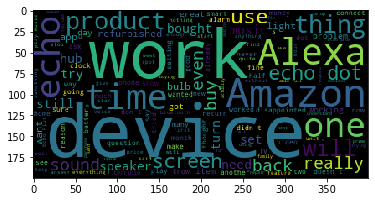

In [243]:
plt.imshow(WordCloud().generate(negative_sentences_combined))

In [284]:
data.drop(["rating","date","length"], inplace=True, axis=1)

In [285]:
variation_dummies = pd.get_dummies(data['variation'], drop_first = True)

In [286]:
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [287]:
data.drop("variation", inplace=True, axis=1)

In [288]:
data.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [289]:
data=pd.concat([data, variation_dummies], axis=1)

In [290]:
data.shape

(3150, 17)

In [251]:
# Sometimes, we want to remove the punctuations from the documents 
from string import punctuation

# It's a string so we have to them into a set type
print('From string.punctuation:', type(punctuation), punctuation)

From string.punctuation: <class 'str'> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [252]:
# Stopwords
from nltk.corpus import stopwords

stopwords_en = stopwords.words('english')
print(stopwords_en)
stopwords_en = set(stopwords.words('english')) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [253]:
stopwords_en_withpunct = stopwords_en.union(set(punctuation))

In [254]:
print(stopwords_en_withpunct)

{'yours', 'no', "'", 'before', "needn't", "you'll", 'been', ')', 'wasn', 'both', '?', 'while', 'theirs', '.', 'myself', 'at', 'needn', 'isn', 'have', '|', '{', 'what', '\\', 'as', 'some', 'you', "hadn't", 'up', 'again', 'ma', 'your', 'me', 'himself', 'did', 'into', 'below', 'his', '>', 'will', 'hasn', "mightn't", '*', '~', 'mightn', 't', 'be', 'same', ']', 'don', 'on', 'above', 'has', "aren't", "wouldn't", 'wouldn', 'a', 'yourselves', 'was', "it's", 'not', "should've", 'i', 'that', "mustn't", 'shan', "you're", 'and', 'between', 's', "won't", 'he', 'for', 'once', 'whom', 'those', 'because', 'hers', 'more', 'having', 'themselves', 'my', 'weren', '@', "that'll", 'ours', 'until', 'when', ',', 'them', 'but', '-', 'aren', "hasn't", 'few', 'if', 'about', 'now', 'in', "don't", 'should', "couldn't", 'she', 'an', 'll', 're', 'any', 'couldn', 'doesn', 'y', "you'd", 'of', 'can', 'm', 'the', 'such', '<', 'haven', 'only', 'off', 'him', 'too', 'their', "didn't", 'after', '(', 'they', '%', '=', 'or', 

In [255]:
stopwords_json = ["’",".i","a","'s","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z",]

In [256]:
# Combine the stopwords and punctuation
stoplist_combined = set.union(set(stopwords_json), stopwords_en_withpunct)

In [257]:
print(stoplist_combined)

{'no', 'alone', 'comes', 'together', 'used', 'while', 'theirs', 'myself', 'unfortunately', 'probably', 'course', 'much', 'greetings', 'except', 'again', 'needs', 'himself', 'another', 'nobody', 'into', 'n', 'his', 'keep', 't', 'elsewhere', 'presumably', 'plus', 'hereafter', "aren't", 'however', "wouldn't", 'z', 'was', 'namely', 'whither', 'everything', "should've", 'someone', 'serious', "can't", 'thence', 'though', 'he', 'able', 'more', 'once', 'whom', '}', 'might', 'having', 'my', 'r', 'fifth', 'given', '@', 'anyhow', 'says', 'consequently', 'thus', 'must', "hasn't", 'anyone', 'believe', 'causes', 'awfully', 'whether', 'if', 'now', "don't", 'look', "where's", 'she', 'otherwise', 'any', 'et', 'looks', 'thereby', 'rd', 'sent', 'either', 'happens', 'wherever', 'let', "didn't", 'after', 'obviously', 'could', 'second', 'won', 'appropriate', 'cause', 'o', 've', 'looking', "he's", 'beforehand', 'others', 'towards', 'trying', 'ought', 'am', 'sometime', 'indicate', 'nearly', '_', 'next', 'c', 

In [258]:
from nltk import sent_tokenize, word_tokenize

In [259]:
#[word for word in data['verified_reviews']]

In [260]:
#[word for word in word_tokenize(data['verified_reviews'].iloc[0]) if word not in stoplist_combined]

In [291]:
def preprocess(reviews):
    clean = [word for word in word_tokenize(reviews) if word.lower() not in stoplist_combined and not word.isdigit()]
    return clean

In [292]:
clean_df = data['verified_reviews'].apply(preprocess)

In [293]:
#print(clean_df[5])

In [294]:
#data['verified_reviews'].iloc[2016]

In [295]:
from io import StringIO
from sklearn.feature_extraction.text import CountVectorizer

In [296]:
vect = CountVectorizer(analyzer=preprocess)
vectorizer = vect.fit_transform(data['verified_reviews']);

In [297]:
print(vect.get_feature_names())

["''", "'Clock", "'Group", "'M", "'Quote", "'Things", "'Thunderstorm", "'alexa", "'beta", "'d", "'ll", "'m", "'re", "'skills", "'ve", "'wake", '***Love', '*this', '+++++', '-*', '--', '-so', '-the', '..', '...', '..and', '..good', '..thank', '..the', '..you', '.Alexa', '.As', '.Love', '.The', '.but', '.do', '.it', '.love', '.need', '.on', '.so', '.takes', '.the', '.this', '.works', '//www.amazon.com/dp/B073SQYXTW/ref=cm_cr_ryp_prd_ttl_sol_18', '/off/', '/port', '07/23/18', '10.00', '10/10', '100+', '100X', '10:30pm', '1100sf', '12-20', '12am', '1GB', '1rst', '1st', '2-3', '2-Original', '2-or', '2.4GHZ', '2.4ghz', '2.99', '20-30', '24-48', '24/7', '29.99', '2nd', '2package', '3-4', '3-Dots', '3.5', '3.99', '3/5', '39.99', '3rd', '3x', '3xs', '4.5', '40,000', '4K', '4am', '4k', '4th', '5GHZ', '5GHz', '5am', '5am.', '5ghz', '5th', '600+', '6th', '70.00', '79.00', '8+', '80s', '8GB', '=y', 'A+', 'A++++', 'A+++++', 'A.I', 'A1', 'A19', 'ABC', 'ABSOLUTELY', 'AF', 'AI', 'ALARM', 'ALEXA', 'ALEX

In [298]:
print(vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [299]:
vectorizer.shape

(3150, 4499)

In [300]:
data.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(vectorizer.toarray())

In [301]:
data = pd.concat([data, reviews], axis=1)

In [302]:
data.shape

(3150, 4515)

In [303]:
data.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4489,4490,4491,4492,4493,4494,4495,4496,4497,4498
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
x = data.drop('feedback', axis=1)

In [305]:
y= data['feedback']

In [306]:
x.shape
y.shape

(3150, 4514)

(3150,)

In [307]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [308]:
from sklearn.naive_bayes import MultinomialNB

In [309]:
nb = MultinomialNB()

In [310]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [311]:
from sklearn.metrics import classification_report, confusion_matrix

In [312]:
pred = nb.predict(X_test)

In [313]:
cm = confusion_matrix(pred, y_test)

In [330]:
print(confusion_matrix(pred, y_test))

[[ 18  10]
 [ 27 575]]


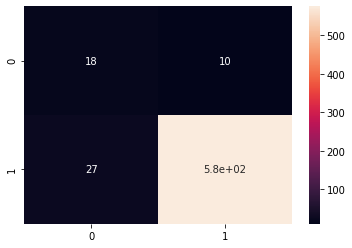

In [314]:
sns.heatmap(cm, annot=True)

In [316]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.40      0.64      0.49        28
           1       0.98      0.96      0.97       602

    accuracy                           0.94       630
   macro avg       0.69      0.80      0.73       630
weighted avg       0.96      0.94      0.95       630



In [ ]:
#Using Logistic Regression model for predictions to see if it works better

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [319]:
lg = LogisticRegression()

In [321]:
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [322]:
lg_pred = lg.predict(X_test)

In [323]:
print(classification_report(lg_pred, y_test))

              precision    recall  f1-score   support

           0       0.31      0.70      0.43        20
           1       0.99      0.95      0.97       610

    accuracy                           0.94       630
   macro avg       0.65      0.82      0.70       630
weighted avg       0.97      0.94      0.95       630



In [326]:
print(accuracy_score(lg_pred, y_test))

0.9412698412698413


In [328]:
print(confusion_matrix(lg_pred, y_test))

[[ 14   6]
 [ 31 579]]
